In [1]:
# import required python packages and modules
import numpy as np
import matplotlib.pyplot as plt

In the code block below, you have the python version of Archie's first law, which states that the conductivity of a medium is influenced by the porosity of the medium ($\phi$), and the conductivity of the water in the pore space ($\sigma_w$) in Siemens per meter [S/m]:
$$
\sigma_{soil} = \phi^{m}\sigma_{w}.
$$
Hereby, a cementation exponent $m$ is introduced to account for the connectedness of the pores in the medium. For soils, this is generally fixed at a value of 1.5. 
The porosity takes into account the ratio of the bulk density ($d_b$, [g/cm<sup>3</sup>]) to the particle density ($p_d$, [g/cm<sup>3</sup>]):
$$
\phi = 1-\frac{b_d}{p_d},
$$
whereby, for soils, the particle density is generally fixed at 2.65 g/cm<sup>3</sup>.

Alongside the conductivity of the bulk material, the key influencing factor on the conductivity of the pore solution in Archie's first law, the structure of the medium is taken into account in the formation factor, which is defined as:

$$
F = \phi^{-m}.
$$

In [2]:
def archie_1(b_dens, p_dens, ec_water, m_exp):
    """
    Parameters
    ----------
    b_dens = float
        bulk density in grams per centimeter cube
    p_dens = float
        particle density in grams per centimeter cube
    ec_water = float
        conductivity of the pore solution in S/m
    m_exp = float
        cementation exponent, dimensionless parameter to account 
        for the pore connectivity (generally fixed at 1.5 for soils)

    Returns
    -------
    ec_soil = float
        electrical conductivity of the bulk soil in S/m
    f_form = float
        formation factor, dimensionless
    """
    phi = 1-(b_dens/p_dens)
    ec_soil = (phi**m_exp)*ec_water
    f_form = phi**(-m_exp)

    return ec_soil, f_form

bulk_ec, formation_factor = archie_1(1.25,2.6,0.075,1.5)
ec_mS = round(bulk_ec*1000, 2)

print(f"The bulk ec is {ec_mS} mS/m.")

The bulk ec is 28.06 mS/m.


By assuming that the sole phase contributing to the medium’s conductivity is the pore fluid (water occupying the pore space), this first form has limited applicability. The second form of Archie’s law therefore expands on this, by considering the degree of saturation $S_{w}$, and describes a resistivity index I that accounts for the influence of partial saturation of a medium as:
$$
I = S^{-n}_{w}.
$$
This incorporates a saturation exponent n, which relates to the pore structure of the medium, while the degree of saturation equals the ratio of the volumetric water content to the porosity of the medium:
$$
S_w = \frac{\theta}{\phi}
$$
By combining Archie’s first and second law as:
$$
\sigma = \phi^{m}S_{w}^{n}\sigma_{w} = \frac{1}{F}S_{w}^{n}\sigma_{w},
$$

the conductivity can be estimated for partially saturated media whereby $m$ and $n$ allow including the influence of the medium’s structure.

In [3]:
def archie_2(b_dens, p_dens, w_vol, n_exp):
    """
    Parameters
    ----------
    b_dens = float
        bulk density in grams per centimeter cube
    p_dens = float
        particle density in grams per centimeter cube
    w_vol = float
        volumetric water content
    n_exp = float
        saturation exponent, dimensionless fitting parameter to account 
        for the pore structure (generally fixed at 2 for soils)

    Returns
    -------
    ec_soil = float
        electrical conductivity of the bulk soil in S/m
    f_form = float
        resistivity index, degree of water saturation
    """
    phi = 1-(b_dens/p_dens) 
    sat_w = w_vol/phi
    i_res = sat_w**(-n_exp)
    return i_res, sat_w

res_index, w_saturation = archie_2(1.25,2.6,0.2,2)

print(f"For a degree of saturation of {round(w_saturation,2)},\
the resistivity index is {round(res_index,2)}.")


For a degree of saturation of 0.39,the resistivity index is 6.74.


In [4]:
def archie_cmb(b_dens, p_dens, ec_water, m_exp, w_vol, n_exp):
    """
    Parameters
    ----------
    b_dens = float
        bulk density [g/cm**3]
    p_dens = float
        particle density [g/cm**3]
    ec_water = float
        conductivity of pore water [S/m] 
    n_exp = float
        saturation exponent, dimensionless fitting parameter to account 
        for the pore structure (generally fixed at 2 for soils) [-]

    Returns
    -------
    ec_soil = float
        electrical conductivity of the bulk soil in S/m
    f_form = float
        resistivity index, degree of water saturation
    """
    phi = 1-(b_dens/p_dens)
    sat_w = w_vol/phi
    f_form = phi**(-m_exp)
    ec_soil = (phi**m_exp)*(sat_w**n_exp)*(ec_water)
    return ec_soil

Archie’s law was originally developed for sandy rocks, which presents significant shortcomings when applied to other media such as soils. Most importantly, surface conduction (i.e., the conduction along the surface of dry particles) is not taken into account. In all soils, the influence of surface conductance is non-negligible, and increases with clay content. To mediate this, the empirical model proposed by  includes a term for surface conduction into the combined Archie’s law, to obtain the bulk conductivity of saturated media as:
$$
\sigma = \frac{S^n_w}{F}\left(\sigma_w + \frac{\sigma_{surface}}{S_{w}}\right),
$$
with surface conduction $\sigma_{surface}$. This surface conduction is related to the cation exchange capacity (and, consequentially the clay content) of the considered medium. To make explicit this relationship,  proposed an empirical model relating $\sigma_{surface}$ to sand, silt and clay content through:
$$
\sigma_{surface} = c_1\frac{clay}{sand + silt} + c_2. 
$$
The factors c_1 and c_2 are experimentally obtained fitted constants, set as: $c_1$ = 0.654, and $c_2$ = 0.018. Combined with the Waxman & Smits model, this gives:
$$
\sigma_{soil} =  \frac{S_w^n}{F}\left(\sigma{w}+\frac{0.654\frac{clay}{sand+silt}+0.018}{S_w}\right).
$$
In this pedophysical model, the bulk soil conductivity $\sigma_{soil}$ is shown to increase with increasing clay content

In [5]:
def doussan_ruy(vmc, b_dens, sand, silt, clay, ec_water):

    """
    Parameters
    ----------
    vmc = int
        volumetric moisture content (0.01 - 1)
    b_dens = float
        bulk density in grams per centimeter cube
    p_dens = float
        particle density in grams per centimeter cube
    sand = int
        sand content in percentage (0 - 100)
    silt = int
        silt content in percentage (0 - 100)
    clay = int
        clay content in percentage (0 - 100)
    ec_water = float
        conductivity of pore water (Siemens per meter)
    m_exp = float
        cementation exponent, dimensionless parameter to account 
        for the pore connectivity (generally fixed at 1.5 for soils)
    n_exp = float
        saturation exponent, dimensionless fitting parameter to account 
        for the pore structure (generally fixed at 2 for soils)

    Returns
    -------
    ec_soil = float
        electrical conductivity of the bulk soil in S/m
    """
    m_exp = 1.5
    n_exp = 2
    p_dens = 2.65

    phi = 1-(b_dens/p_dens)
    sat_w = vmc/phi
    f_form = phi**(-m_exp)
 
    if clay > 6:
        ec_surface = (0.654*(clay/(sand+silt))) + 0.018
    else:
        ec_surface = 0.023*clay - 0.0209
    

    ec_soil = ((sat_w**n_exp)/f_form)*(ec_water+(ec_surface/sat_w))
    return (ec_soil) 

In [6]:
def linde (vmc, b_dens, sand, silt, clay, ec_water):
    #(vmc_f, b_dens_i[i], s_in, s_in, clay_f, ec_water_f)
    m_exp = 1.5
    n_exp = 2
    p_dens = 2.65
    phi = 1-(b_dens/p_dens)
    sat_w = vmc/phi
    f_form = phi**(-m_exp)



    radius_clay = 0.002/2000
    radius_silt = 0.025/2000
    radius_sand = 0.75/2000

    ce_solid = 2.5*(10**-9)
    ec_clay= 3*(ce_solid/radius_clay)
    ec_silt = 3*(ce_solid/radius_silt)
    ec_sand = 3*(ce_solid/radius_sand)

    ec_surface = np.average([ec_clay*(clay/100),ec_sand*(sand/100),ec_silt*(silt/100)])
    

    ec_soil = (((sat_w**n_exp)*ec_water) + (f_form - 1)*(ec_surface))/f_form
    return (ec_soil) 

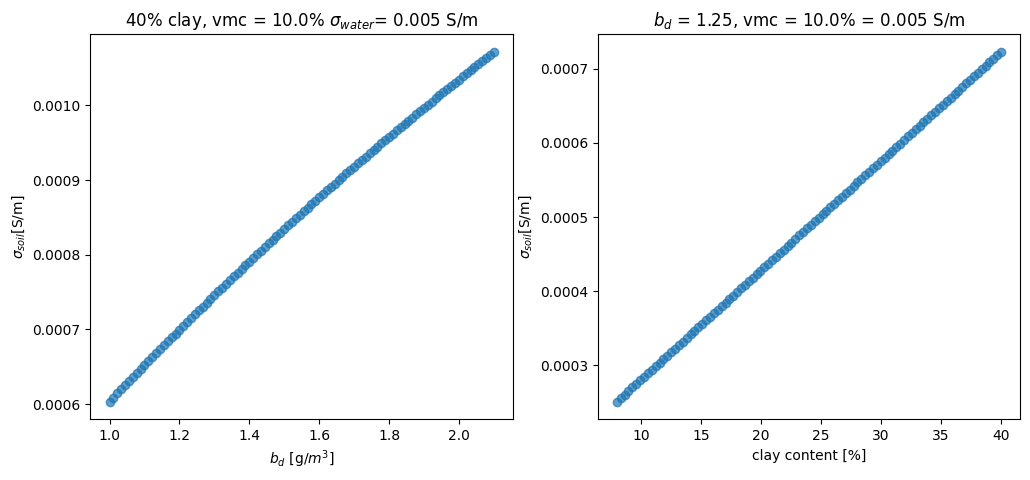

In [7]:
# Simple plot to evaluate the effect of clay content and bulk density

n_iter = 100 #number of iterations for plotting
linde_eq = True # determine if you want to use the Linde model, or Doussan & Ruy

clay_i = np.linspace(8,40,n_iter)
b_dens_i = np.linspace(1,2.1,n_iter)

# values for fixed parameters
clay_f = 40
b_dens_f = 1.25

vmc_f = 0.10
ec_water_f = 0.005 #S/m

# create empty list to populate with iteration results
b_it = []
c_it = []

# iterate over bulk densities
for i in range(n_iter):
    s_in = (100-clay_f)/2
    if linde_eq:
        ec_out=linde(vmc_f, b_dens_i[i], s_in, s_in, clay_f, ec_water_f)
    else:
        ec_out=doussan_ruy(vmc_f, b_dens_i[i], s_in, s_in, clay_f, ec_water_f)
    
    b_it.append([ec_out,b_dens_i[i]])

# iterate over clay contents
for i in range(n_iter):
    sand_in = (100-clay_i[i])/2
    silt_in = sand_in
    if linde_eq:
        ec_out=linde(vmc_f, b_dens_f,
                            sand_in, silt_in, clay_i[i], 
                            ec_water_f  
                            )
    else:
        ec_out=doussan_ruy(vmc_f, b_dens_f,
                            sand_in, silt_in, clay_i[i], 
                            ec_water_f  
                            )

    c_it.append([ec_out,clay_i[i]])
ec_bd = np.asarray(b_it)
ec_cl = np.asarray(c_it)

fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize=[12,5])
axes[0].scatter(ec_bd[:,1], ec_bd[:,0],
            alpha=.7)
axes[1].scatter(ec_cl[:,1], ec_cl[:,0],
            alpha=.7)
axes[0].set_xlabel("$b_d$ [g/$m^3$]")
axes[0].set_ylabel("$\sigma_{soil}$[S/m]")
axes[0].set_title(f"{clay_f}% clay, "+ f"vmc = {vmc_f*100}% "+ "$\sigma_{water}$" + f"= {ec_water_f} S/m")
axes[1].set_xlabel("clay content [%]")
axes[1].set_ylabel("$\sigma_{soil}$[S/m]")
axes[1].set_title("$b_d$ = 1.25, " + f"vmc = {vmc_f*100}% "+  f"= {ec_water_f} S/m")
plt.show()

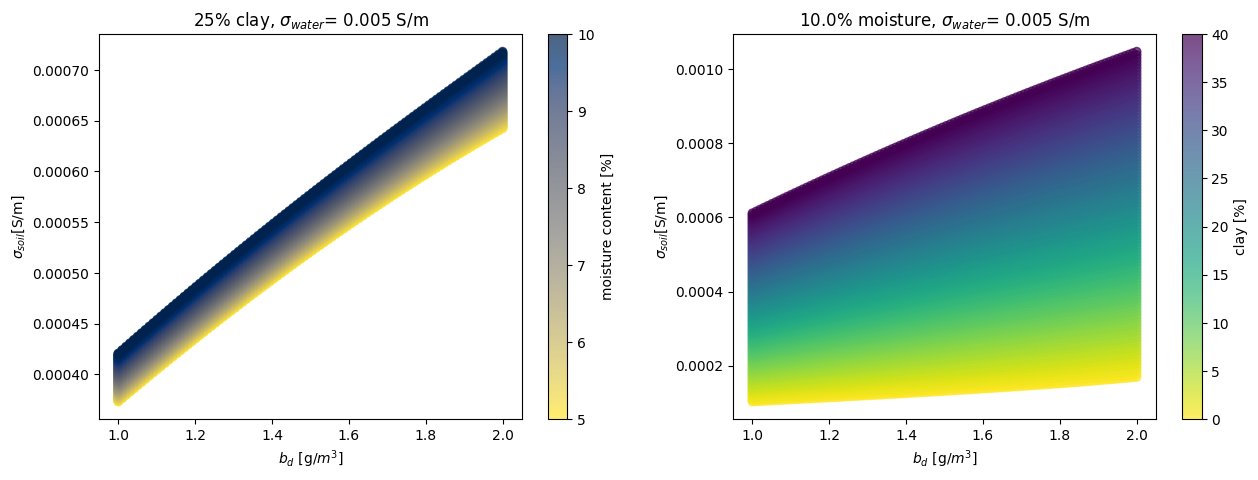

In [8]:
# iterate over 2 variables and plot
# #################################

n_iter = 100 # number of iterations per modulated variable
linde_eq = True # determine if you want to use the Linde model, or Doussan & Ruy

# values for modulating parameters 
vmc_i = np.linspace(0.05,0.10,n_iter)
b_dens_i = np.linspace(1,2,n_iter)
clay_i = np.linspace(0,40,n_iter)

# values for fixed parameters
clay_f = 25
vmc_f = 0.10
b_dens_f = 1.25
ec_water_f = 0.005 #S/m
sand_f = (100-clay_f)/2
silt_f = sand_f

# iterate over array of parameters
##################################
# Empty lists for results
lst_vmc = []
lst_cly = []

# Iteration over variations in moisture content and bulk density
#***************************************************************
for i in range(n_iter):
    for ii in range(n_iter):
        bd_iter = b_dens_i[ii]
        sand = (100-clay_f)/2
        silt = sand
        if linde_eq:
            ec_out=linde(vmc_i[i], b_dens_i[ii],
                            sand_f, silt_f, clay_f, 
                            ec_water_f
                            )
        else:
            ec_out=doussan_ruy(vmc_i[i], b_dens_i[ii],
                    sand_f, silt_f, clay_f, 
                    ec_water_f
                    )
        lst_vmc.append([ec_out,vmc_i[i],b_dens_i[ii]])
# put results in numpy array
ec_vmc_bd = np.asarray(lst_vmc)


# Iteration over variations in moisture content and bulk density
#***************************************************************
for i in range(n_iter):
    clay_iter = clay_i[i]
    for ii in range(n_iter):
        bd_iter = b_dens_i[ii]
        sand = (100-clay_f)/2
        silt = sand
        if linde_eq:
            ec_out=linde(vmc_f, bd_iter, 
                            sand, silt, clay_iter, 
                            ec_water_f)
        else:
            ec_out=doussan_ruy(vmc_f, bd_iter, 
                    sand, silt, clay_iter, 
                    ec_water_f)
        lst_cly.append([ec_out,clay_iter,bd_iter])
# put results in numpy array
ec_clay_bd = np.asarray(lst_cly)


########################################################################

# Plotting
fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize=[15,5])
scatter_0 = axes[0].scatter(ec_vmc_bd[:,2], ec_vmc_bd[:,0], 
                alpha=.7,
                c=(ec_vmc_bd[:,1]*100),
                cmap='cividis_r'
                )
axes[0].set_xlabel("$b_d$ [g/$m^3$]")
axes[0].set_ylabel("$\sigma_{soil}$[S/m]")
axes[0].set_title(f"{clay_f}% clay, "+ "$\sigma_{water}$" + f"= {ec_water_f} S/m")

scatter_1 = axes[1].scatter(ec_clay_bd[:,2], ec_clay_bd[:,0],
                alpha=.7,
                c=ec_clay_bd[:,1],
                cmap='viridis_r'
                )
axes[1].set_xlabel("$b_d$ [g/$m^3$]")
axes[1].set_ylabel("$\sigma_{soil}$[S/m]")
axes[1].set_title(f"{vmc_f*100}% moisture, "+ "$\sigma_{water}$" + f"= {ec_water_f} S/m")
fig.colorbar(scatter_0, ax = axes[0],label = "moisture content [%]")
fig.colorbar(scatter_1, ax = axes[1],label = "clay [%]")
plt.show()